This notebook allows to explore the results of predicting the `click_rate` from `source_article` to `target_article` using different models (Doc2Vec, Wikipedia2Vec, Smash-RNN Paragraph Level, Smash-RNN Sentence Level and Smash-RNN Word Level).

The class `ResultsAnalyzer` encapsules the logic to compute the results. Main features:
- `get_ndcg_for_all_models`: Calculates the Normalized Discounted Cumulative Gain for each model
- `get_map_for_all_models`: Calculates the Mean Average Precision for each model
- `get_top_5_predicted_by_article_and_model(source_article, model)`: Gets the top 5 predictions for the `source_article`. The column `is_in_top_5` shows if the `target_article` is in the **actual** top 5 click rate.
- `ResultsAnalyzer.results`: It is a Pandas Datafram containing the consolidated results
- `get_sample_source_articles`: Samples 10 random `source_articles`. Can be used to manually check the results

In [5]:
import matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from results_analyzer import ResultsAnalyzer

from utils.constants import (WORD_COUNT_BIN,
OUT_LINKS_BIN,
OUT_LINKS_COLUMN,
IN_LINKS_BIN,
IN_LINKS_COLUMN,
PARAGRAPH_COUNT_BIN,
SENTENCE_COUNT_BIN,
WORD_COUNT_COLUMN,
SENTENCE_COUNT_COLUMN,
PARAGRAPH_COUNT_COLUMN,
MISSING_WORDS_COLUMN,
MISSING_WORDS_BIN,
MODEL_COLUMN,
SMASH_MODELS,
COMPLETE_MODELS,
COSINE_MODELS,
SMASH_WORD_LEVEL)

pd.options.display.float_format = '{:,.4f}'.format
results_analyzer = ResultsAnalyzer()

The first step is to calculate the NDCG@10 for all models and articles. This will be used to all the further calculations, tables and figures:

In [ ]:
_results = results_analyzer.calculate_statistics_per_article()

To generate the performance figures according to the source articles features, you can use the function `get_performance_figure`:

[2020-11-17 20:07:39,164] [INFO] Getting features from DB (calculate_statistics_per_article@results_analyzer.py:428)
[2020-11-17 20:07:39,471] [INFO] Getting predictions by model (calculate_statistics_per_article@results_analyzer.py:447)
[2020-11-17 20:07:39,483] [INFO] Aggregating predictions for each model (get_predictions_by_model@results_analyzer.py:247)
100%|██████████| 10/10 [00:07<00:00,  1.31it/s]
[2020-11-17 20:07:47,116] [INFO] Calculating results by model (calculate_statistics_per_article@results_analyzer.py:456)
100%|██████████| 474/474 [00:04<00:00, 111.97it/s]


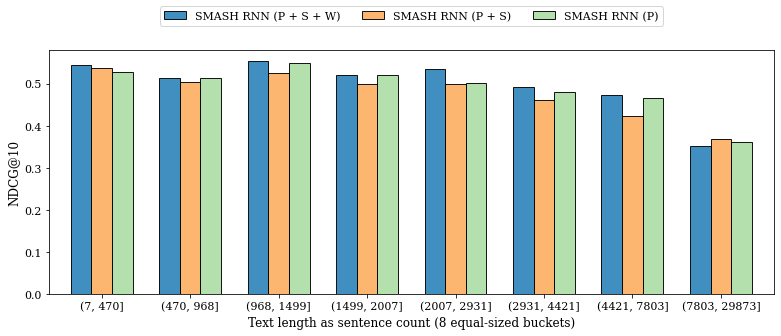

In [6]:
results_analyzer.get_performance_figure(SMASH_MODELS, 
                                        WORD_COUNT_COLUMN, 
                                        "Text length as sentence count (%s equal-sized buckets)",
                                       )

To generate the overall performance table by model, you can use the function `get_performance_by_model`. The parameter can take the constants `COMPLETE_MODELS`, `SMASH_MODELS` or `COSINE_MODELS`

In [ ]:
`

To generate the performance table for different `ks`, you can use the function `get_performance_different_k`. The parameter `selected_models` can take the constants COMPLETE_MODELS, SMASH_MODELS or COSINE_MODELS. The parameter `ks` can take a list of integers.

In [ ]:
results_analyzer.get_performance_different_k(COMPLETE_MODELS, ks=[1, 3, 5, 10])

To generate a table with the actual and predicted results for an article, you can use the function `get_article_results`. If no parameters are given, it will select a random article for the model `SMASH RNN (P + S + W)`.

In [7]:
results_analyzer.get_article_results()

Source article: Battle: Los Angeles
         actual click rate               smash_word_level
0            Aaron Eckhart            Skyline (2010 film)
1       Michelle Rodriguez                    1941 (film)
2  Ramón Rodríguez (actor)                  Aaron Eckhart
3         Bridget Moynahan                  Will Rothhaar
4    Battle of Los Angeles               Bridget Moynahan
5       Jonathan Liebesman                   Michael Peña
6                    Ne-Yo  War of the Worlds (2005 film)
7             Michael Peña   Independence Day (1996 film)
8            Will Rothhaar             Michelle Rodriguez
9              Jim Parrack                    Jim Parrack
